<h1 align="center">Spam Classification</h1>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sn

# Read the Data

In [8]:
with open('SMSSpamCollection.txt') as fh:
    lines = list(fh)
    
data = [(line.split()[0], ' '.join(line.split()[1:])) for line in lines]
data_df = pd.DataFrame.from_records(data, columns=['label', 'text'])

# Check Class Imbalance

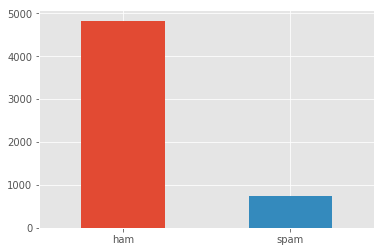

In [12]:
counts = data_df.label.value_counts()
ax = counts.plot(kind='bar', rot=0) 

# Model Construction and Cross-validation

In this case, we'll use a `CountVectorizer` to count the words in both documents, and then a Multinomial Naive Bayes with add-one smoothing.

In [14]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
pipeline = Pipeline([
    ('counter', CountVectorizer(min_df=5, max_df=0.3, lowercase=True)),
    ('model', MultinomialNB(fit_prior=False))
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1000)

predictions = cross_val_predict(
    pipeline, 
    data_df.text.values, 
    data_df.label.values, 
    cv=cv)

report = classification_report(predictions, data_df.label.values)
print(report)

             precision    recall  f1-score   support

        ham       0.98      0.99      0.98      4750
       spam       0.95      0.86      0.91       824

avg / total       0.97      0.97      0.97      5574

